In [1]:
from FDFD.Fdfd import Fdfd

import matplotlib.pylab as plt
import numpy as np
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
omega = 5e14                # angular frequency (2pi)
dl = 1e-7                   # grid size (m)
eps_r = np.ones((100,100))  # relative permittivity
eps_r[40:60, 40:60] = 5     # define box
NPML = [10, 10]             # number of pml grid points on x and y borders
pol = 'Hz'                  # polarization (either 'Hz' or 'Ez')

In [3]:
# sets simulation variables, constructs system matrix 'A', stored in 'simulation' object
simulation = Fdfd(omega,eps_r,dl,NPML,pol)

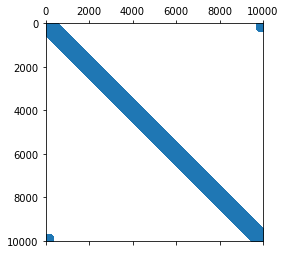

In [4]:
# look at sparsity pattern of A
plt.spy(simulation.A)
plt.show()

In [5]:
# set source and solve for electromagnetic fields
b = np.zeros((simulation.Nx,simulation.Ny))
b[40:60,30] = 1
(Hx,Hy,Ez) = simulation.solve_fields(b)

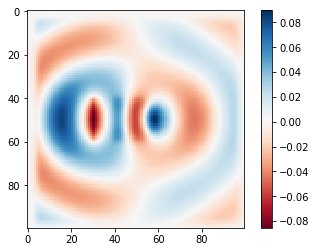

In [6]:
# plot
plt.imshow(np.real(Ez), cmap='RdBu')
plt.colorbar()

In [7]:
simulation

In [8]:
B = sp.spdiags(np.random.rand(3), 0, 3, 3)
B = B.astype(float)

In [9]:
print(np.real(B))

  (0, 0)	0.7129927722520646
  (1, 1)	0.808688811119883
  (2, 2)	0.24585430041370904


In [10]:
print(type(np.imag(B)))

<class 'scipy.sparse.dia.dia_matrix'>


In [11]:
B1 = sp.hstack([np.real(B), -np.imag(B)])

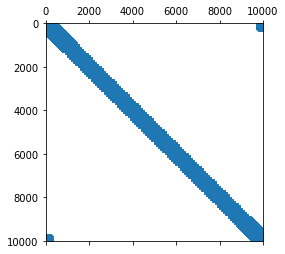

In [12]:
plt.spy(np.imag(simulation.A))

In [27]:
# Test that we can do generic linear algebra 
from FDFD.linalg import solver_direct

N = int(1e3)
density = 0.01
A = sp.csr_matrix(sp.rand(N, N, density)+1j*sp.rand(N, N, density)+sp.eye(N))
b = np.random.rand(N,1)+1j*np.random.rand(N,1)
x = solver_direct(A, b)
np.testing.assert_array_almost_equal((A*x).reshape(N,1), (b).reshape(N,1))